In [75]:
import json
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

In [76]:
res_dir_path = r"D:\ENTC\PROJECTS\Deep-Learning-for-End-to-End-Over-the-Air-Communications\Sequence Decoder"
EPS = 1e-6

def get_all_experiments_as_obj(experiment_name):
    res_dir_abs_path = os.path.join(res_dir_path,experiment_name)
    if False == os.path.exists(res_dir_abs_path):
        raise Exception("The experiment directory not found")
    
    all_experiment_rec_files = os.listdir(res_dir_abs_path)
    all_experiments = []
    

    for rec_file in all_experiment_rec_files:
            with open(os.path.join(res_dir_abs_path,rec_file),"r") as file:
                experiment_obj = json.load(file)
                all_experiments.append(experiment_obj)
                
    return all_experiments


def limit_properties(obj_list,interested_properties):
    new_objs = []
    for obj in obj_list:
        new_obj = dict()
        for prop in interested_properties:
            new_obj[prop] = obj[prop]
        new_objs.append(new_obj)
    return new_objs   


def stem_propeties(experiments_objs,feature_x,feature_y):
    x = []
    y = []
    for obj in experiments_objs:
        x.append(obj[feature_x])
        y.append(obj[feature_y])
        
    plt.stem(x,y)
    plt.show()

    # plot bit accuracy vs SNR for each CFO_coef
def comparative_plot(EXP,FEATURE_X,FEATURE_Y,COMPAR_VAR_NAME,stem=False):
    # COMPAR_VAR_NAME = "CFO_coef"
    # FEATURE_X = "SNR"
    # FEATURE_Y = "bit_accuracy"
    COMPAR_VAR_POOL = [0.1, 0.5, 1]
    collections = []
    for comp_var in COMPAR_VAR_POOL:
        filtered_exp = [exp for exp in EXP if exp[COMPAR_VAR_NAME] == comp_var]
        separated_exp = {
            "comp_var_name": COMPAR_VAR_NAME,
            "comp_var": comp_var,
            "exp_list": filtered_exp
        }
        collections.append(separated_exp)


    fig,ax = plt.subplots(1,1)
    for collection in collections:
        x = []
        y = []
        for exp in collection['exp_list']:
            x.append(exp[FEATURE_X])
            y.append(exp[FEATURE_Y])
        if stem:
            if not x:
                continue
            ax.stem(x,y)
        else:
            ax.plot(x,y,label=f'{collection["comp_var_name"]} = {collection["comp_var"]}')

    ax.grid()
    ax.legend()
    plt.show()

    
    
def stats_BLER(experiments):
    buffer = []
    for exp in experiments:
        buffer.append(exp['BLER'])
    return {"mean": np.array(buffer).mean(), 
            "min":np.array(buffer).min()}
    

## Full CFO

In [127]:
EXP = get_all_experiments_as_obj("grand-full-cfo-1") + get_all_experiments_as_obj("grand-full-cfo-2")
# EXP

In [78]:
# EXP = [exp for exp in EXP if exp['n_epochs']==40 and exp["state_width"]==8]

In [128]:
for exp in EXP:
    exp["BLER"] = 1- exp["bit_accuracy"]

In [129]:
stats_BLER(

            list(filter(lambda x: x['SNR']==6 and x['state_width']==8,
                    limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])))

)

{'mean': 0.02046874999999998, 'min': 0.015312499999999951}

zipped [(0, -0.029623598328601786), (1, -0.5945238661338861), (2, -1.2128868164991582), (4, -2.0279824013259837), (8, -1.0054584978049663)]


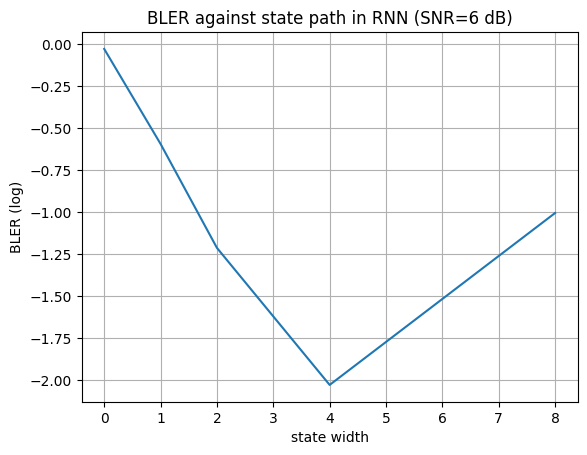

In [111]:
state_width_all = [0,1,2,4,8]
log_bler_min_all = []
for state_width in state_width_all:
    
    bler_min = stats_BLER(

                list(filter(lambda x: x['SNR']==1 and x['state_width']==state_width,
                        limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])))

    )['min']
    
    log_bler_min_all.append(np.log10(bler_min + EPS))
    
plt.plot(state_width_all,log_bler_min_all)
print("zipped", list(zip(state_width_all,log_bler_min_all)))


plt.title("BLER against state path in RNN (SNR=6 dB)")
plt.xlabel("state width")
plt.ylabel("BLER (log)")
plt.grid()
plt.show()

## No CFO

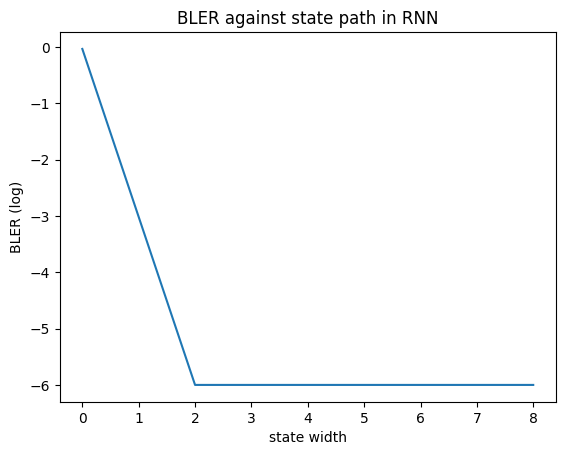

In [82]:
EXP = get_all_experiments_as_obj("grand-no-cfo")
for exp in EXP:
    exp["BLER"] = 1- exp["bit_accuracy"]
    
    
state_width_all = [0,2,8]
log_bler_min_all = []
for state_width in state_width_all:
    
    bler_min = stats_BLER(

                list(filter(lambda x: x['SNR']==6 and x['state_width']==state_width,
                        limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])))

    )['min']
    
    log_bler_min_all.append(np.log10(bler_min + EPS))
    
plt.plot(state_width_all,log_bler_min_all)
plt.title("BLER against state path in RNN")
plt.xlabel("state width")
plt.ylabel("BLER (log)")
plt.show()

[]

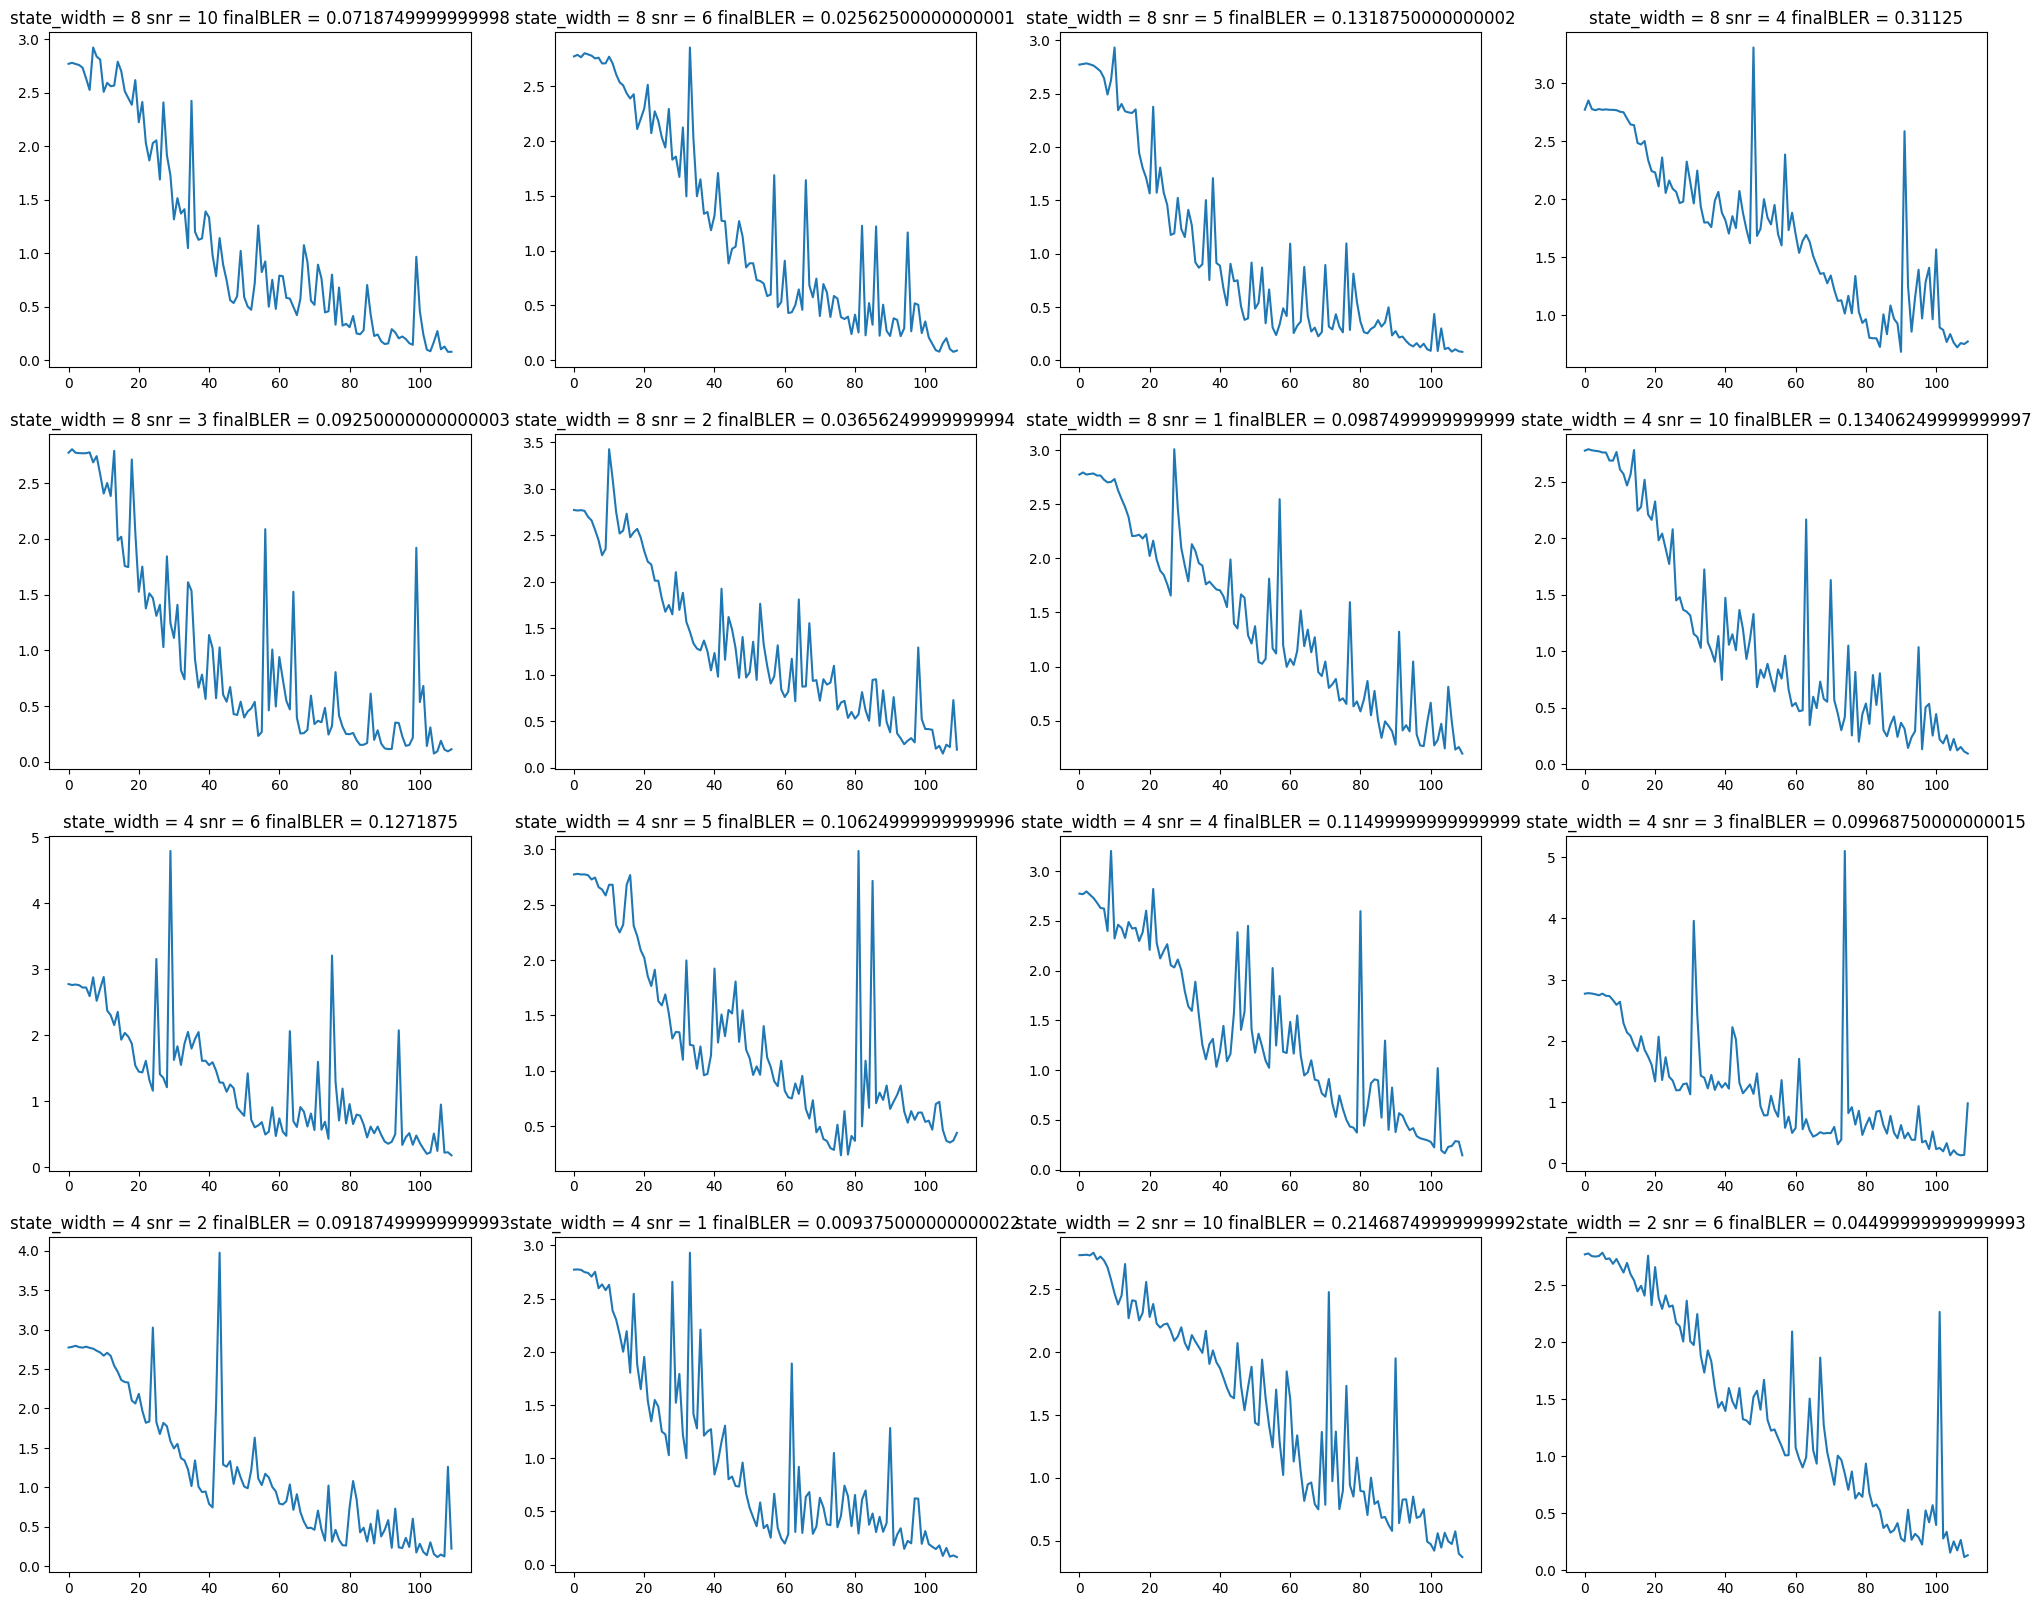

In [85]:
# limit_properties(EXP,['SNR','bit_accuracy','CFO_coef'])

In [112]:
# stem_propeties(EXP,'SNR','bit_accuracy')